In [67]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [68]:
class Stats(TypedDict):
    runs : int
    balls : int
    fours : int
    six : int
    
    sr : float
    bpb : float
    bper : float
    
    Summary : str

In [81]:
def calculate_sr(state : Stats):
    runs = state['runs']
    sr = (runs/ state['balls']) * 100
    
    return {'sr' : sr}

In [84]:
def calculate_bpb(state : Stats):
    
    bpb = (state['balls'] / (state['fours'] + state['six']))
    
    return {'bpb' : bpb}

In [75]:
def calculate_bper(state : Stats):
    
    boundary_percent = (((state['fours'] * 4) + (state['six'] * 6))/state['runs'])*100
    
    return {'bper' : boundary_percent}

In [72]:
def Summary(state : Stats):
    
    Summary =  f"""
    Runs = {state['runs']}
    balls = {state['balls']}
    fours = {state['fours']}
    six = {state['six']}
    sr = {state['sr']}
    bper = {state['bper']}
    bpb = {state['bpb']}          
    """
    
    return {'Summary':Summary}

In [85]:
# define graph
graph = StateGraph(Stats)

# add nodes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_bper', calculate_bper)
graph.add_node('Summary',Summary)

# add edge
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_bper')
graph.add_edge('calculate_sr','Summary')
graph.add_edge('calculate_bper','Summary')
graph.add_edge('calculate_bpb','Summary')
graph.add_edge('Summary',END)

# compile
workflow = graph.compile()

In [87]:
print(workflow.invoke({'runs' : 50,
                 'balls':30,
                 'fours':2,
                 'six':2
                 }))

{'runs': 50, 'balls': 30, 'fours': 2, 'six': 2, 'sr': 166.66666666666669, 'bpb': 7.5, 'bper': 40.0, 'Summary': '\n    Runs = 50\n    balls = 30\n    fours = 2\n    six = 2\n    sr = 166.66666666666669\n    bper = 40.0\n    bpb = 7.5          \n    '}


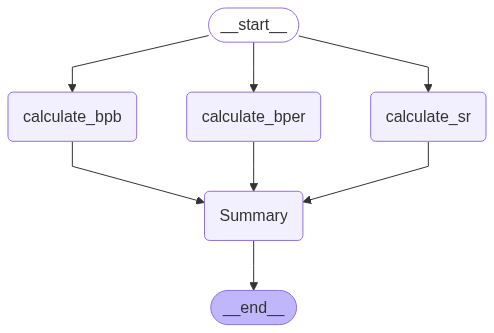

In [88]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())